<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h4 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>
<h4 align="center">Python Assignment 3</h4>


________________________________________________________________________________________________________________________________

**Feel free to contact us via telegram if you have any question: @SAHABE200 (Q2) ,@amirsoleix (Q1 and Q3)**

# Q1: SVD for Compression (35 points)

One application of Singular Value Decomposition is lossy image compression. In this question, we want to compress BMP images using SVD. BMP images are not compressed by default and the pixel information is stored in rather a simple format. Colored BMP files are composed of three matrices of size $n × m$ where $n$ and $m$ are the height and width of the image, respectively. Each matrix corresponds to one of the three colors Red, Green, and Blue. Each entry of these matrices is a number between 0 and 255 that specifies the intensity of the corresponding color. The final array is hence a 3D array of size $n × m × 3$.
To open BMP files in Python, you can use the `imread` function from `matplotlib.image` library and to show the image, you can use the `imshow` function from `matplotlib.pyplot` library.

### 1.1 Image display  (2.5 points)
Choose two arbitrary BMP files (it is recommended to use different subjects and sizes) and load it into a `numpy` array using the `imread` function. Then, show each image.
Apply the following steps to each of the two images and display the results.

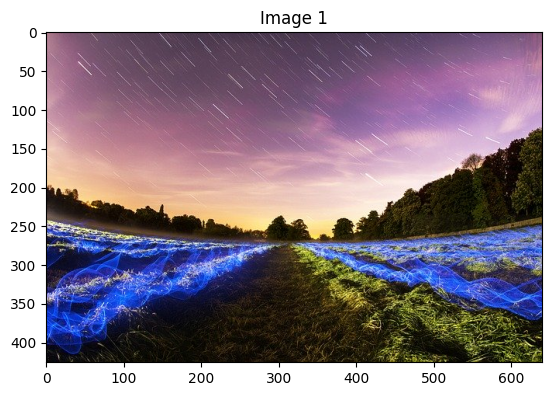

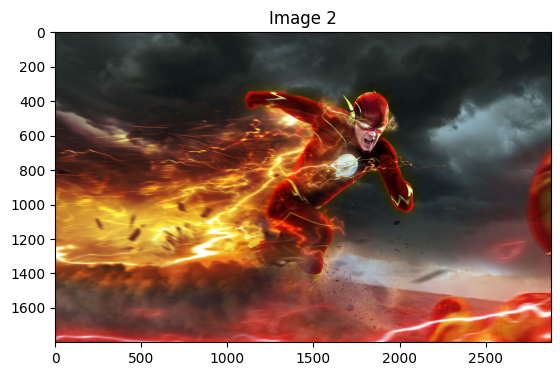

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the first BMP image
img1 = mpimg.imread('Land.bmp')

# Display the first BMP image
plt.imshow(img1)
plt.title('Image 1')
plt.show()

# Load the second BMP image
img2 = mpimg.imread('The Flash.bmp')

# Display the second BMP image
plt.imshow(img2)
plt.title('Image 2')
plt.show()

### 1.2 Channel Separation (2.5 points)
Separate three channels corresponding to red, green, and blue colors.
``` Python
r = img[:, :, 0]
g = img[:, :, 1]
b = img[:, :, 2]
```

In [2]:
# Separate the channels of the first BMP image
img1_red = img1[:, :, 0]
img1_green = img1[:, :, 1]
img1_blue = img1[:, :, 2]

# Separate the channels of the second BMP image
img2_red = img2[:, :, 0]
img2_green = img2[:, :, 1]
img2_blue = img2[:, :, 2]

### 1.3 Singular Value Decomposition (10 points)
Using appropriate libraries, calculate the SVD decomposition of each of the arrays.
$$
A = U \Sigma V^T
$$
where $A$ is the original array, $U$ is an $n × n$ unitary matrix, $\Sigma$ is an $n × m$ rectangular diagonal matrix with non-negative real numbers on the diagonal, and $V$ is an $m × m$ unitary matrix.

In [3]:
# Calculate the SVD decomposition of the channels for the first BMP image
U1_red, S1_red, VT1_red = np.linalg.svd(img1_red)
U1_green, S1_green, VT1_green = np.linalg.svd(img1_green)
U1_blue, S1_blue, VT1_blue = np.linalg.svd(img1_blue)

# Calculate the SVD decomposition of the channels for the second BMP image
U2_red, S2_red, VT2_red = np.linalg.svd(img2_red)
U2_green, S2_green, VT2_green = np.linalg.svd(img2_green)
U2_blue, S2_blue, VT2_blue = np.linalg.svd(img2_blue)

### 1.4 Compression (10 points)
Since eigenvalues in the decomposition are sorted in descending order, we can approximate the original array by keeping only the first $k$ columns of $U$, first $k$ rows and columns of $\Sigma$, and first $k$ rows of $V^T$.
Select $k$ to be 5, 10, 50, 100 and 250 and approximate the original array using the truncated SVD. Show the approximated image titled with the value of $k$.

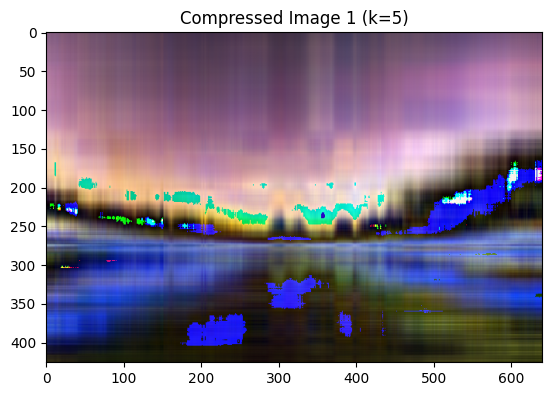

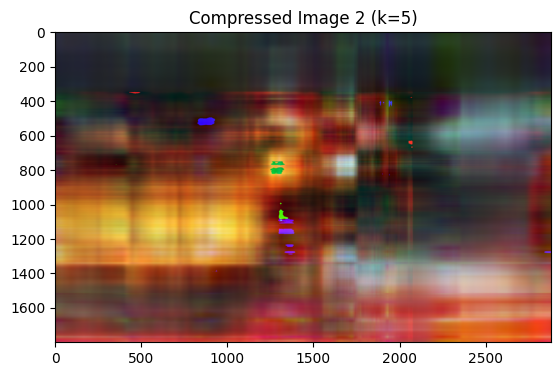

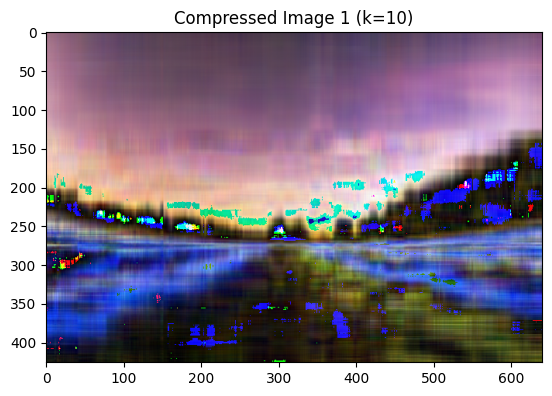

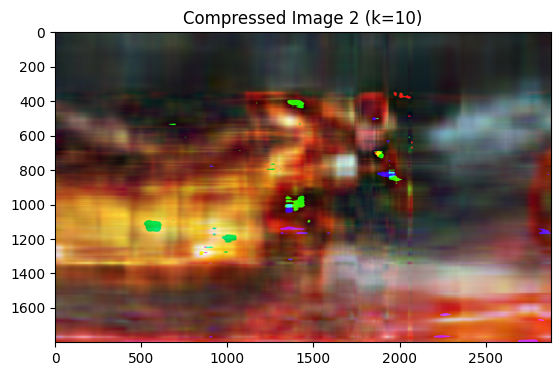

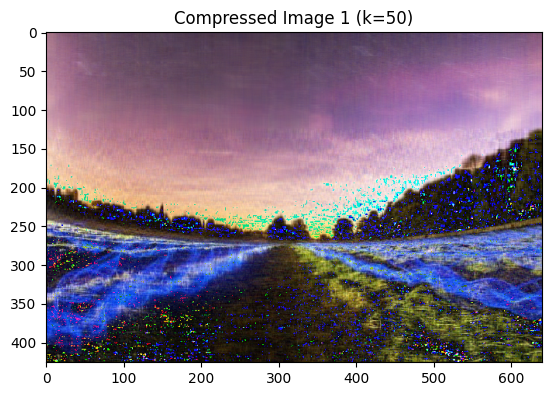

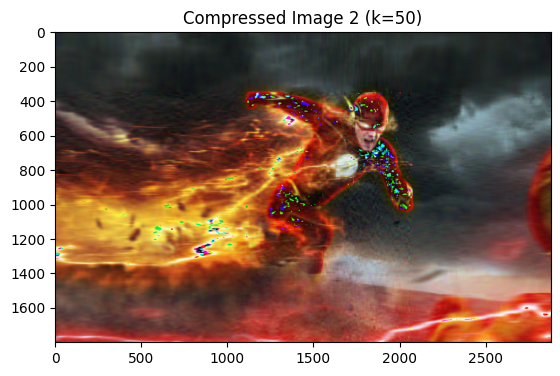

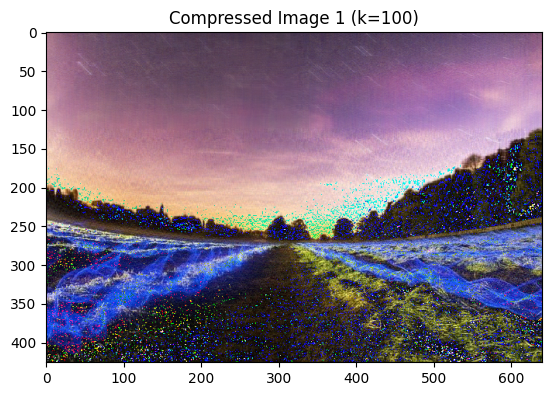

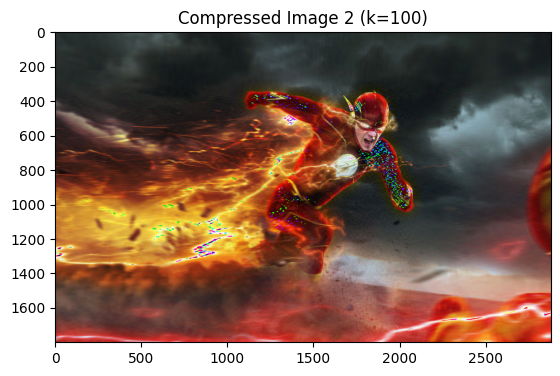

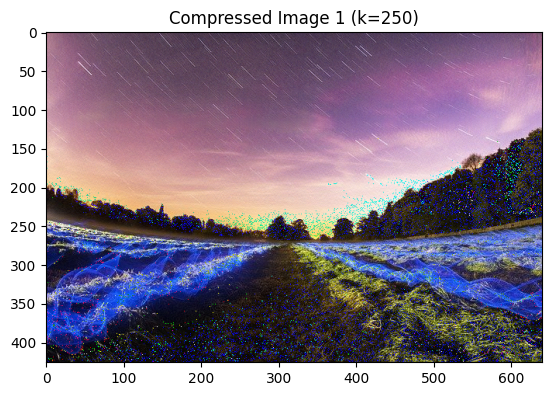

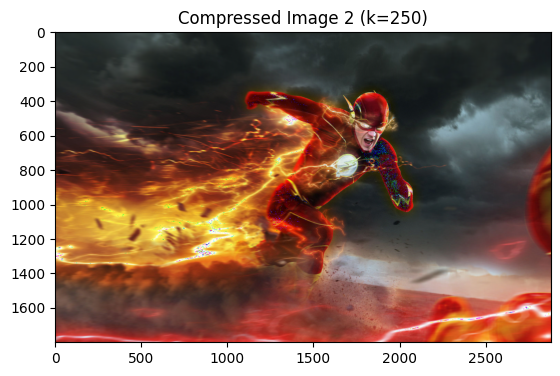

In [4]:
# Define the number of columns/rows to keep for the compression
K = [5, 10, 50, 100, 250]

# Compress the images for each value of K
for k in K:
    # Compress the channels for the first BMP image
    A1_red = np.dot(U1_red[:, :k], np.dot(np.diag(S1_red[:k]), VT1_red[:k, :]))
    A1_green = np.dot(U1_green[:, :k], np.dot(np.diag(S1_green[:k]), VT1_green[:k, :]))
    A1_blue = np.dot(U1_blue[:, :k], np.dot(np.diag(S1_blue[:k]), VT1_blue[:k, :]))

    # Compress the channels for the second BMP image
    A2_red = np.dot(U2_red[:, :k], np.dot(np.diag(S2_red[:k]), VT2_red[:k, :]))
    A2_green = np.dot(U2_green[:, :k], np.dot(np.diag(S2_green[:k]), VT2_green[:k, :]))
    A2_blue = np.dot(U2_blue[:, :k], np.dot(np.diag(S2_blue[:k]), VT2_blue[:k, :]))

    # Reconstruct the compressed image for the first BMP image
    A1 = np.zeros_like(img1)
    A1[:,:,0] = A1_red
    A1[:,:,1] = A1_green
    A1[:,:,2] = A1_blue

    # Reconstruct the compressed image for the second BMP image
    A2 = np.zeros_like(img2)
    A2[:,:,0] = A2_red
    A2[:,:,1] = A2_green
    A2[:,:,2] = A2_blue

    # Display the compressed image for the first BMP image
    plt.imshow(A1)
    plt.title(f'Compressed Image 1 (k={k})')
    plt.show()

    # Display the compressed image for the second BMP image
    plt.imshow(A2)
    plt.title(f'Compressed Image 2 (k={k})')
    plt.show()

### 1.5 Compression Factor (10 points)
It seems that no compression is done since the size of the approximated array is the same as the original array. However, there is no need to store $U$ and $V$ matrices. Instead, we can store $\Sigma$ and two other matrices of size $n × k$ and $m × k$. Hence, we can compress the image by a factor of $\frac{nm}{k(n+m+1)}$. Calculate the compression factor for each value of $k$ and display the results in a table.

In [6]:
# Define the size of the original image arrays
n1, m1, d1 = img1.shape
n2, m2, d2 = img2.shape

# image 1
# Define a dictionary for storing the compression factors
compression_factors = {}

# Compute the compression factor for each value of k
for k in K:
    # Compute the size of the compressed arrays
    compressed_size = k * (n1 + m1 + 1)

    # Compute the compression factor
    compression_factor = (n1 * m1) / compressed_size

    # Store the compression factor in the dictionary
    compression_factors[k] = compression_factor

# Display the compression factors in a table
print('Compression Factor Table Image 1')
print('------------------------')
print('|  k  |  Compression Factor |')
print('------------------------')
for k in K:
    print(f'| {k: 3d} |        {compression_factors[k]: 6.2f}        |')
print('------------------------')

# image 2
# Define a dictionary for storing the compression factors
compression_factors = {}

# Compute the compression factor for each value of k
for k in K:
    # Compute the size of the compressed arrays
    compressed_size = k * (n2 + m2 + 1)

    # Compute the compression factor
    compression_factor = (n2 * m2) / compressed_size

    # Store the compression factor in the dictionary
    compression_factors[k] = compression_factor

# Display the compression factors in a table
print('\n')
print('Compression Factor Table Image 2')
print('------------------------')
print('|  k  |  Compression Factor |')
print('------------------------')
for k in K:
    print(f'| {k: 3d} |        {compression_factors[k]: 6.2f}        |')
print('------------------------')

Compression Factor Table Image 1
------------------------
|  k  |  Compression Factor |
------------------------
|   5 |         51.10        |
|  10 |         25.55        |
|  50 |          5.11        |
|  100 |          2.56        |
|  250 |          1.02        |
------------------------


Compression Factor Table Image 2
------------------------
|  k  |  Compression Factor |
------------------------
|   5 |         221.49        |
|  10 |         110.75        |
|  50 |         22.15        |
|  100 |         11.07        |
|  250 |          4.43        |
------------------------


# Q2: PCA in Image Processing (40 points)

In this question you will implement the PCA from scratch and apply it for dimensionality
reduction and image denoising. you will use the well-known MNIST data set that is commonly used for training various image processing systems.


#### 1. Data Preparation (5 points)
The MNIST data set is a large data set of handwritten digits (from
0 to 9), containing 60000 gray-scale images for training and 10000 for testing, each image has 28x28 pixels with range of possible values from 0 to 255.

we will consider a small sample of MNIST data set with size of 2000.

Re-scale the images to [0, 1] dividing them by 255. Vectorize each image xi ∈ $R^d$ and form a matrix X=$[x1, . . . , xn]^T$ ∈ $R_{n×d}$.
Remark that we will have d=784 and n=2000.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from keras.datasets import mnist
from numpy.linalg import eigh

In [8]:
# TODO: load the data set(use just x_train for next part)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [9]:
# TODO: selecting 2000 images and dividing them by 255
n = 2000
x_train = x_train[:n]/255.0
print("Shape of X_train after selection and scaling:", x_train.shape)

# TODO: vectorize each image and forming matrix X
d = x_train.shape[1]*x_train.shape[2]
X = x_train.reshape(n, d)
print("Shape of X after vectorization:", X.shape)

# TODO: normalizing the data mean=0 std=1(hint:use StandardScaler())
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
print("Shape of X_norm after normalization:", X_norm.shape)

Shape of X_train after selection and scaling: (2000, 28, 28)
Shape of X after vectorization: (2000, 784)
Shape of X_norm after normalization: (2000, 784)


#### 2. Compute the Eigendecomposition (10 points)
Compute the eigendecomposition of the sample covariance matrix and use the eigenvalues to calculate the percentage of variance explained (given by the eigenvalues).
Plot the cumulative sum of these percentages (also known as cumulative explained variance. you can read about it in [cumulative explained variance](https://vitalflux.com/pca-explained-variance-concept-python-example/)) versus the number of components.

*Hint: you can use cumsum from Numpy to calculate the cumulative sum.*


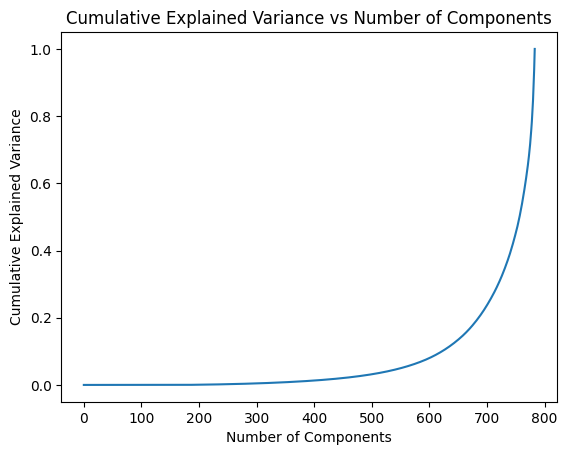

In [10]:
# TODO: Compute the covariance matrix
cov_mat = np.cov(X_norm.T)

# TODO: Eigendecomposition of covariance matrix
eig_vals, eig_vecs = eigh(cov_mat)

# TODO: Compute explained variance ---> eigenvalue/(sum of egn_values )
variance_explained = eig_vals / np.sum(eig_vals)

# TODO: Plot the cumulative explained variance
cumulative_variance_explained = np.cumsum(variance_explained)
plt.plot(cumulative_variance_explained)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Number of Components')
plt.show()

#### 3. Reduce the Dimensionality (10 points)
Apply the PCA via Eigendecomposition to reduce the dimensionality of the images for each p ∈ {50, 250, 500}.

Compute the normalized reconstruction error in terms of the Frobenius norm, i.e. $e_p = \frac{||X - {X_p}||_F}{||X||_F}$ , where $X$ denotes the input matrix, and ${X_p}$ denotes the recovered matrix associated to each p.

Visualize some recovered images and compare them with their corresponding original images.

what happens when we reduce the number of components p?

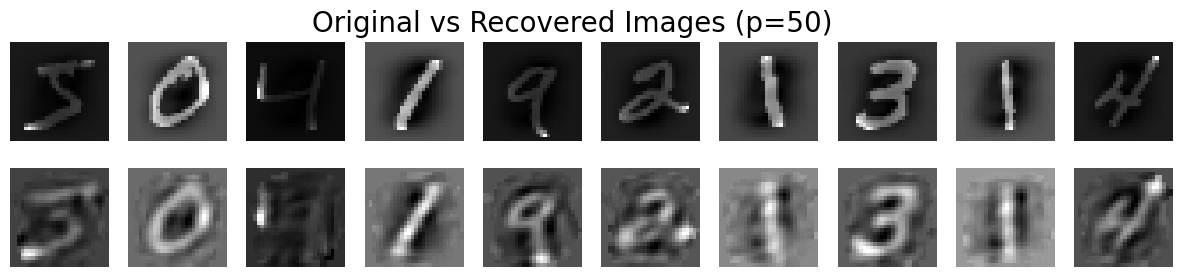

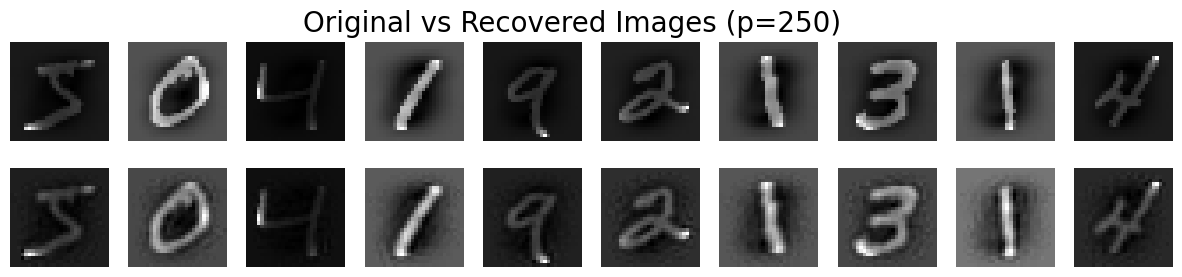

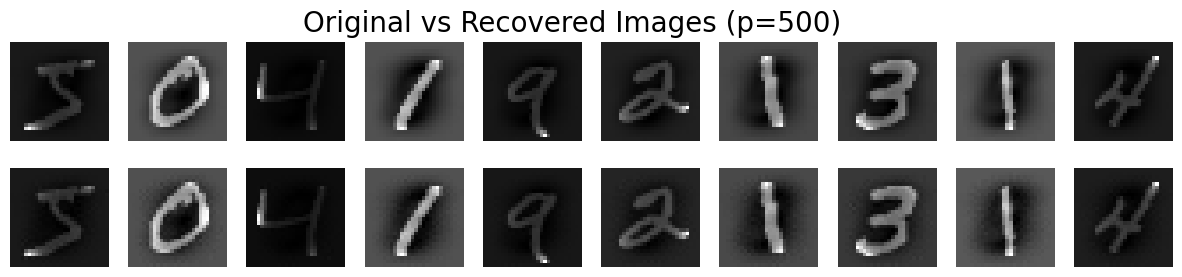

In [13]:
# TODO: Apply the PCA
P = [50, 250, 500]

for p in P:
  W = eig_vecs[:, -p:]
  X_reduced = np.dot(X_norm, W)

  # TODO: reconstruct the orginal matrix X
  X_rec = np.dot(X_reduced, W.T)

  # TODO: Visualize recovered images
  fig, axes = plt.subplots(2, 10, figsize=(15, 3))
  for i in range(10):
      axes[0, i].imshow(X_norm[i].reshape(28, 28), cmap='gray')
      axes[0, i].axis('off')
      axes[1, i].imshow(X_rec[i].reshape(28, 28), cmap='gray')
      axes[1, i].axis('off')
  plt.suptitle(f'Original vs Recovered Images (p={p})', fontsize=20)
  plt.show()

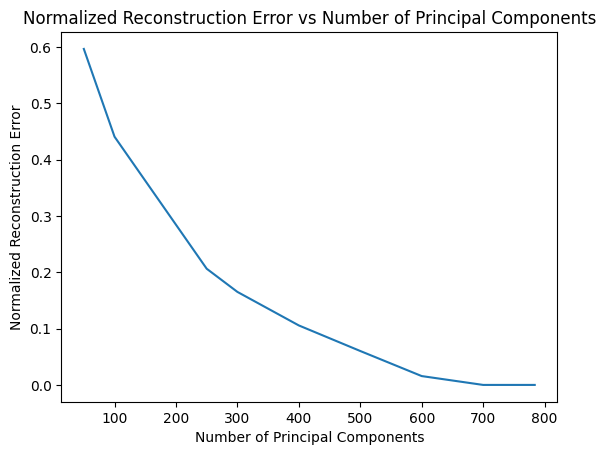

In [14]:
# TODO: Compute the normalized reconstruction error
P = [50, 100, 250, 300, 400, 500, 600, 700, 784]
errors = []

for p in P:
    # Project the data onto the top p principal components
    W = eig_vecs[:, -p:]
    X_reduced = np.dot(X_norm, W)

    # Reconstruct the data using the reduced components
    X_rec = np.dot(X_reduced, W.T)

    # Compute the Frobenius norm of the difference between the original and reconstructed data matrices
    error = np.linalg.norm(X_norm - X_rec, 'fro') / np.linalg.norm(X_norm, 'fro')
    errors.append(error)

# TODO: Plot the normalized reconstruction error vs number of principal components
plt.plot(P, errors)
plt.title('Normalized Reconstruction Error vs Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Normalized Reconstruction Error')
plt.show()

#### 4. Image noising (5 points)
Considering the same input matrix, let’s add some Gaussian noise (make sure that the range of possible values of the generated noisy data will remain between 0 and1, as well as the input data) with zero mean and variance $σ^2$ = 0.25.

Visualize the corrupted images and compare them with their corresponding original images versus the number of components, as in the first item.

Compare it with the one obtained in the noiseless case.

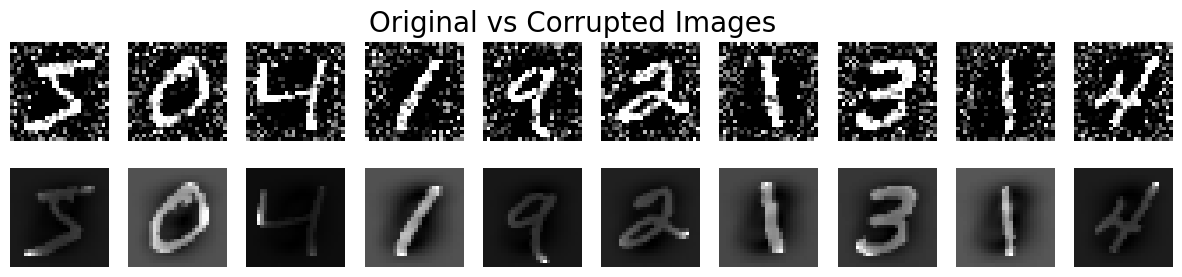

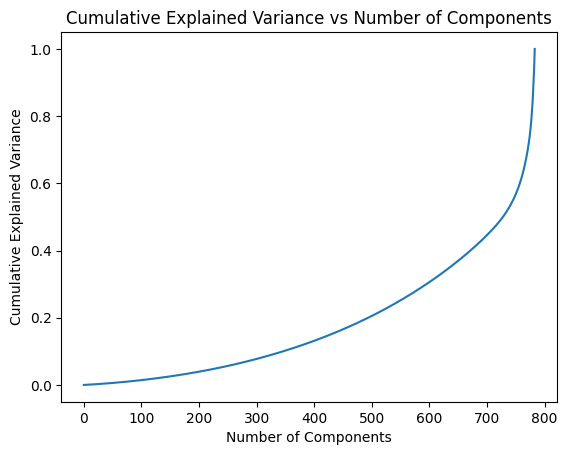

In [17]:
# TODO: Adding Gaussian noise
sigma = 0.5
X_noisy = X_norm + np.random.normal(0, sigma, size=X_norm.shape)
X_noisy = np.clip(X_noisy, 0, 1)  # make sure the values are still between 0 and 1

# TODO: Visualize the corrupted images
fig, axes = plt.subplots(2, 10, figsize=(15, 3))
for i in range(10):
    axes[0, i].imshow(X_noisy[i].reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(X_norm[i].reshape(28, 28), cmap='gray')
    axes[1, i].axis('off')
plt.suptitle(f'Original vs Corrupted Images', fontsize=20)
plt.show()

# TODO: Comparing with noiseless case
cov_mat_noisy = np.cov(X_noisy.T)
eig_vals_noisy, eig_vecs_noisy = eigh(cov_mat_noisy)
variance_explained_noisy = eig_vals_noisy / np.sum(eig_vals_noisy)

cumulative_variance_explained_noisy = np.cumsum(variance_explained_noisy)
plt.plot(cumulative_variance_explained_noisy)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Number of Components')
plt.show()

#### 5. Recovering Images (10 points)
Now we will apply the PCA for image denoising. Generate the noisy data, for each $σ^2$ ∈ {0.15, 0.25, 0.50}.
Apply the PCA via Eigendecomposition for each $σ^2$ and fixing p = 250.

Visualize some recovered images and compare them with their corresponding noisy images.

Compute the normalized reconstruction error in terms of the Frobenius norm, obtained for all values of $σ^2$, with respect to the original images.


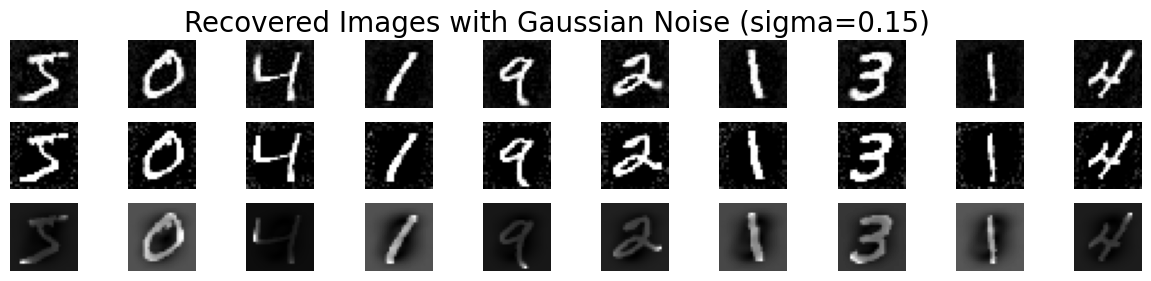

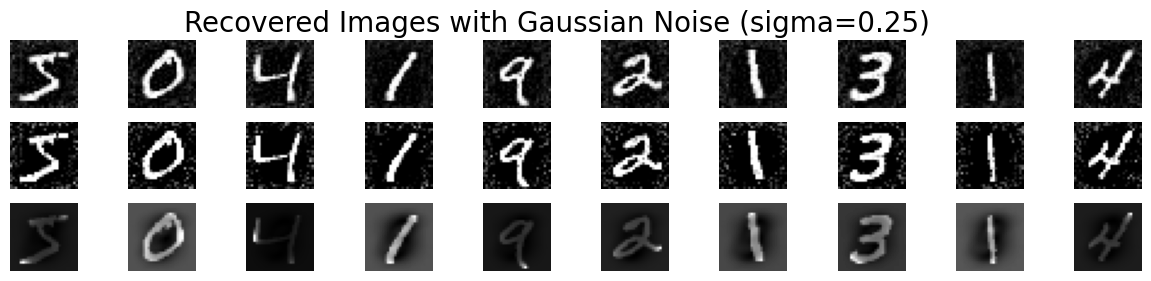

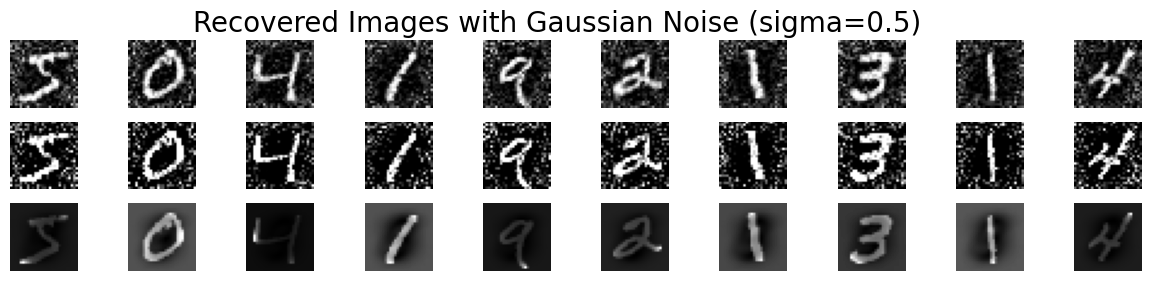

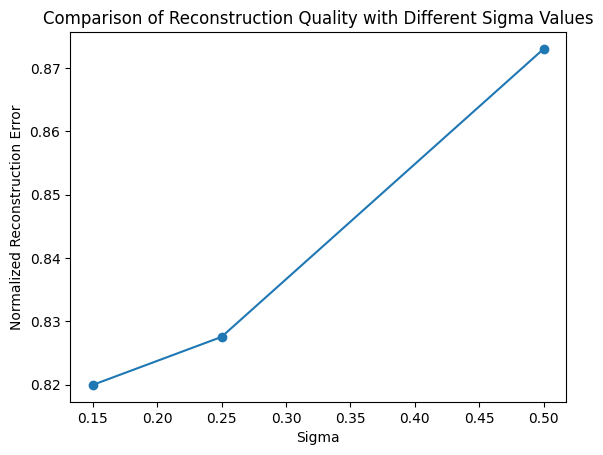

In [34]:
# Define the sigma values for the Gaussian noise
sigmas = [0.15, 0.25, 0.5]

# Fix the number of principal components to keep
p = 250

# Store the reconstruction errors in a list
errors = []

# Generate the noisy data, apply PCA for image denoising and visualize the recovered images
for sigma in sigmas:
    # TODO: Generating noisy data
    X_noisy = X_norm + np.random.normal(0, sigma, size=X_norm.shape)
    X_noisy = np.clip(X_noisy, 0, 1)

    # Compute eigendecomposition of the noisy data covariance matrix
    cov = np.dot(X_noisy.T, X_noisy) / n
    eig_vals, eig_vecs = eigh(cov)

    # TODO: Apply PCA via Eigendecomposition
    W = eig_vecs[:, -p:]
    X_reduced = np.dot(X_noisy, W)

    # TODO: compute the normalized reconstruction
    X_rec = np.dot(X_reduced, W.T)
    X_rec = np.clip(X_rec, 0, 1)

    # Compute the Frobenius norm of the difference between the original and reconstructed data matrices
    error = np.linalg.norm(X_norm - X_rec, 'fro') / np.linalg.norm(X_norm, 'fro')
    errors.append(error)

    # TODO: Visualize recovered images
    fig, axes = plt.subplots(3, 10, figsize=(15, 3))
    for i in range(10):
        axes[0, i].imshow(X_rec[i].reshape(28, 28), cmap='gray')
        axes[0, i].axis('off')
        axes[1, i].imshow(X_noisy[i].reshape(28, 28), cmap='gray')
        axes[1, i].axis('off')
        axes[2, i].imshow(X_norm[i].reshape(28, 28), cmap='gray')
        axes[2, i].axis('off')


    plt.suptitle(f'Recovered Images with Gaussian Noise (sigma={sigma})', fontsize = 20)
    plt.show()

# TODO: plot the normalized reconstruction error
plt.plot(sigmas, errors, marker='o')
plt.xlabel('Sigma')
plt.ylabel('Normalized Reconstruction Error')
plt.title('Comparison of Reconstruction Quality with Different Sigma Values')
plt.show()

# Q3: PCA in Data Analysis (45 points)

We have a dataset containing the movie ratings from 1,000 users. There are 200 movies in the dataset, and each user has rated all of them. The ratings are integers from 1 (worst) to 5 (best). The goal of this problem set is to perform PCA on this dataset and analyze the results.
### 3.1: Data Loading and Visualization (5 points)
First, we need to load the dataset and understand its structure. This data is stored in a CSV file named ratings.csv, with 1,000 rows and 200 columns. Each row corresponds to a user, and each column corresponds to a movie.

1. Load the CSV file into a NumPy array or a pandas DataFrame.
2. Visualize the first few rows of the data to understand its structure.
3. Plot a histogram to show the distribution of the ratings in the dataset.

   Movie_1  Movie_2  Movie_3  Movie_4  Movie_5  Movie_6  Movie_7  Movie_8  \
0        5        1        4        4        4        2        4        3   
1        2        4        5        4        4        2        2        2   
2        3        2        3        3        2        4        4        5   
3        4        1        5        5        1        3        4        2   
4        1        1        3        2        2        1        2        2   

   Movie_9  Movie_10  ...  Movie_191  Movie_192  Movie_193  Movie_194  \
0        5         1  ...          4          1          5          3   
1        4         3  ...          1          4          4          5   
2        5         3  ...          2          3          4          5   
3        3         2  ...          4          1          4          3   
4        1         1  ...          3          1          3          1   

   Movie_195  Movie_196  Movie_197  Movie_198  Movie_199  Movie_200  
0          4          5     

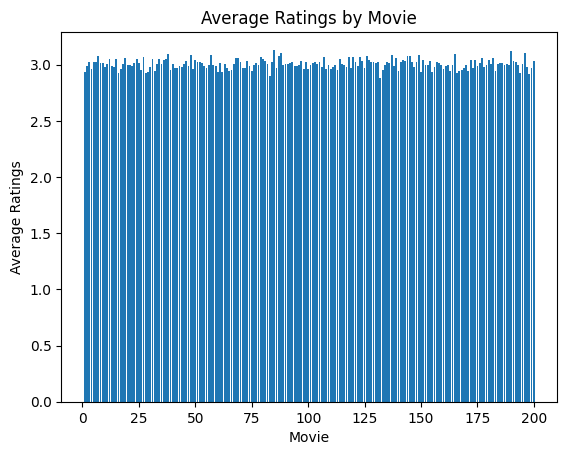

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the ratings.csv file into a pandas DataFrame
ratings_data = pd.read_csv('ratings.csv')

# Display the first few rows of the DataFrame
print(ratings_data.head())

# Plot a histogram of the ratings distribution
movie_ratings = ratings_data.mean(axis=0)
plt.bar(x=range(1, len(movie_ratings)+1), height=movie_ratings)
plt.xlabel('Movie')
plt.ylabel('Average Ratings')
plt.title('Average Ratings by Movie')
plt.show()

### 3.2 Data Preprocessing (5 points)
Before applying PCA, we should preprocess the data.

1. Normalize the data so that each movie has a mean rating of 0 and a standard deviation of 1. This ensures that our PCA isn't affected by the scale of the ratings.
2. Split the dataset into a training set and a test set. Use 80% of the data for training and 20% for testing.

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(ratings_data)

# Split the data into training and test sets
train_data, test_data = train_test_split(normalized_data, test_size=0.2, random_state=42)

### 3.3 Principal Component Analysis (10 points)
Now we can apply PCA to the training set.

1. Implement PCA. You might want to use a library like scikit-learn, or you might choose to implement it from scratch.
**Note: Implementation from scratch is bonus.**
2. Choose the number of principal components to retain. Explain why you chose this number.

In [191]:
from sklearn.decomposition import PCA

# instantiate PCA object with number of components
pca = PCA(n_components=130)

# fit and transform training set
X_pca = pca.fit_transform(train_data)

import numpy as np

# center data
X_centered = train_data - train_data.mean(axis=0)

# calculate covariance matrix
cov_matrix = np.cov(X_centered.T)

# calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# sort eigenvalues in descending order and corresponding eigenvectors
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

# choose number of principal components to retain
n_components = 130

# select top n_components eigenvectors
top_eigenvectors = eigenvectors[:,:n_components]

# project data onto top eigenvectors
X_pca = X_centered.dot(top_eigenvectors)

print("first 5 samples of PCA-transformed data from scratch:\n",X_pca[:5,:5]) # first 5 samples of PCA-transformed data from scratch
print("\nfirst 5 samples of PCA-transformed data from scikit-learn:\n",pca.transform(train_data)[:5,:5]) # first 5 samples of PCA-transformed data from scikit-learn

import matplotlib.pyplot as plt

# Choose the number of principal components to retain
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

n_components = 0
for i in range(len(cumulative_variance_ratio)):
    if cumulative_variance_ratio[i] >= 0.8:
        n_components = i+1
        break
print("\nNumber of components to retain for PCA-transformed data from scikit-learn:", n_components)

# Choose the number of principal components to retain

explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

n_components_retained = 0
for i in range(len(cumulative_variance_ratio)):
    if cumulative_variance_ratio[i] >= 0.8:
        n_components_retained = i+1
        break
print("Number of components to retain for PCA-transformed data from scratch:", n_components_retained)

first 5 samples of PCA-transformed data from scratch:
 [[ 2.41811262 -0.08948676  0.2857467   0.79600439  1.33732665]
 [ 2.38151711 -1.39872773  1.32347285 -0.56575226 -0.60258679]
 [ 0.98505138  0.47122258  1.47386436  0.64040586  0.18513385]
 [-0.52155728  0.38432949  1.26298881  0.07796657 -0.60359015]
 [ 0.38187755 -2.71069559 -0.35740431 -3.4161816  -1.99618323]]

first 5 samples of PCA-transformed data from scikit-learn:
 [[-2.41741093  0.0965952   0.28365631  0.79616226 -1.33586743]
 [-2.38138376  1.40281424  1.32095766 -0.56362411  0.60226309]
 [-0.98562652 -0.46852071  1.47561842  0.63630629 -0.18635669]
 [ 0.52265429 -0.38020649  1.26439278  0.07693117  0.60574881]
 [-0.38234631  2.70926994 -0.36061315 -3.41530164  1.99660401]]

Number of components to retain for PCA-transformed data from scikit-learn: 123
Number of components to retain for PCA-transformed data from scratch: 123


### 3.4 Interpretation of Principal Components (10 points)
The principal components can be difficult to interpret. But since our dataset is about movie ratings, we might expect that they correspond to some kinds of `tastes` in movies.

For each of the first few principal components, find the 5 movies with the highest and lowest loadings.
`Loading` refers to the coefficients of the linear combination of the original variables (in your case, movie ratings) that make up a principal component. They reflect how much each original variable contributes to the principal component.
In terms of their `highest` and `lowest` loading:
1. The variables (or in the context, movies) with the highest loadings on a principal component are those that contribute the most (positively) to that component. In other words, these are the movies that a user rates similarly when considering this underlying factor. They might represent a specific taste in movies. For example, if the first principal component has high loadings for a lot of action movies, it might represent a taste for action films.
2. Conversely, the variables with the lowest loadings (or the most negative) on a principal component contribute negatively to that component. In the context of movie ratings, these might represent the movies that a user tends to rate lower when this underlying taste is considered.

In [192]:
for i in range(3):
    component_loadings = pd.DataFrame(pca.components_[i], index=ratings_data.columns)
    component_loadings.columns = ['loadings']
    component_loadings['abs_loadings'] = np.abs(component_loadings['loadings'])
    print(f"Principal Component {i+1}")
    print("Movies with highest loadings:\n\n", component_loadings.sort_values('loadings', ascending=False).head(5),"\n")
    print("Movies with lowest loadings:\n\n", component_loadings.sort_values('loadings').head(5),"\n")
    print()

Principal Component 1
Movies with highest loadings:

            loadings  abs_loadings
Movie_183  0.203638      0.203638
Movie_92   0.161026      0.161026
Movie_85   0.138675      0.138675
Movie_5    0.135925      0.135925
Movie_126  0.134032      0.134032 

Movies with lowest loadings:

            loadings  abs_loadings
Movie_89  -0.150290      0.150290
Movie_143 -0.137989      0.137989
Movie_48  -0.135909      0.135909
Movie_131 -0.135681      0.135681
Movie_162 -0.134544      0.134544 


Principal Component 2
Movies with highest loadings:

            loadings  abs_loadings
Movie_128  0.193018      0.193018
Movie_120  0.175068      0.175068
Movie_154  0.147097      0.147097
Movie_190  0.143078      0.143078
Movie_5    0.141349      0.141349 

Movies with lowest loadings:

            loadings  abs_loadings
Movie_196 -0.168508      0.168508
Movie_175 -0.152328      0.152328
Movie_91  -0.148988      0.148988
Movie_13  -0.146342      0.146342
Movie_2   -0.142783      0.142783 


Prin

### 3.5 Reconstruction of Ratings and Error Analysis (15 points)
Now we will use our PCA to make predictions.

1. **Project the test set onto the principal components, then reconstruct it.**
  After you've found the principal components (from your training set), you can use them to transform your test set. This involves representing each user in the test set as a combination of the principal components. Then, you `reconstruct` the test set. This means you convert your data back from the principal component space to the original space of movie ratings. This gives you a set of `predicted` ratings for each movie. These predicted ratings aren't exactly the original ratings. They're what the PCA model thinks the ratings should be, based on the patterns it learned from the training set.
2. **Measure the mean squared error (MSE) between the original ratings and the reconstructed ratings. Is the error high or low? Why?**
  To evaluate how good your PCA model is, you compare the predicted ratings to the actual ratings. You calculate the Mean Squared Error (MSE), which is a common way to measure the difference between predicted and actual values.
3. **Plot a scatterplot to show the original ratings (on the x-axis) and the predicted ratings (on the y-axis) for a few users and movies.**
 Finally, you visualize the results with a scatterplot. The x-coordinate is the original rating, and the y-coordinate is the predicted rating. If the PCA model is perfect, all points would lie along the line y = x.

Mean squared error: 0.3569937579792228


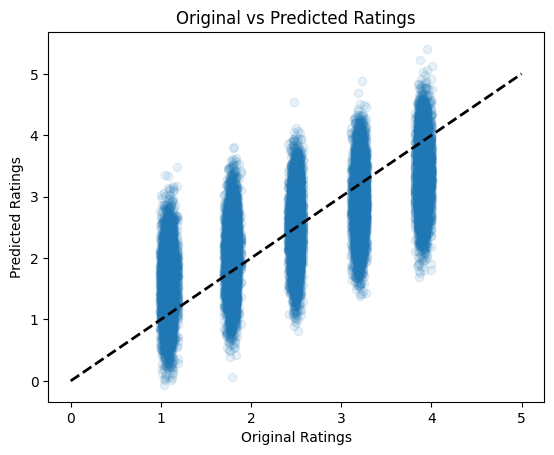

In [193]:
from sklearn.metrics import mean_squared_error

# Transform the test set using the principal components from the training set
test_data_transformed = pca.transform(test_data)
test_data_reconstructed = pca.inverse_transform(test_data_transformed)

# Compute the mean squared error between the original and reconstructed ratings
mse = mean_squared_error(test_data, test_data_reconstructed)
print("Mean squared error:", mse)

# Plot a scatterplot of original ratings vs predicted ratings
fig, ax = plt.subplots()
ax.scatter(test_data.flatten()+2.5, test_data_reconstructed.flatten()+2.5, alpha=0.1)
ax.set_xlabel('Original Ratings')
ax.set_ylabel('Predicted Ratings')
ax.set_title('Original vs Predicted Ratings')
ax.plot([0, 5], [0, 5], 'k--', lw=2)
plt.show()

Mean squared error with 180 components: 0.10209054955914464


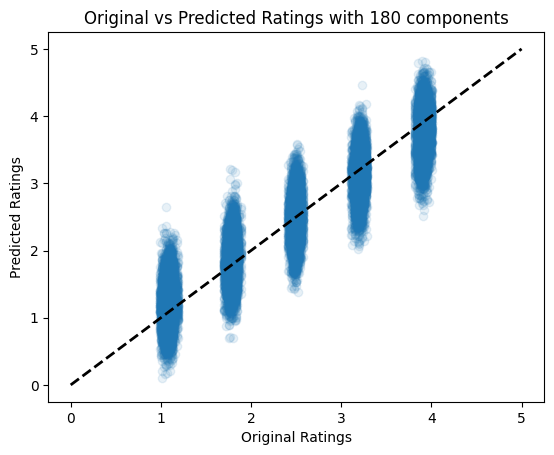



Mean squared error with 190 components: 0.052582628752986985


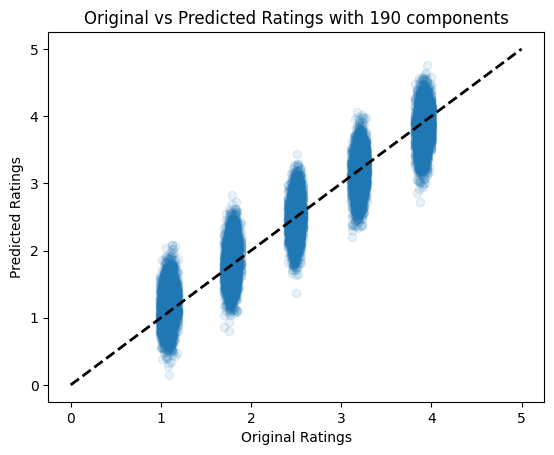



Mean squared error with 198 components: 0.010622935080526388


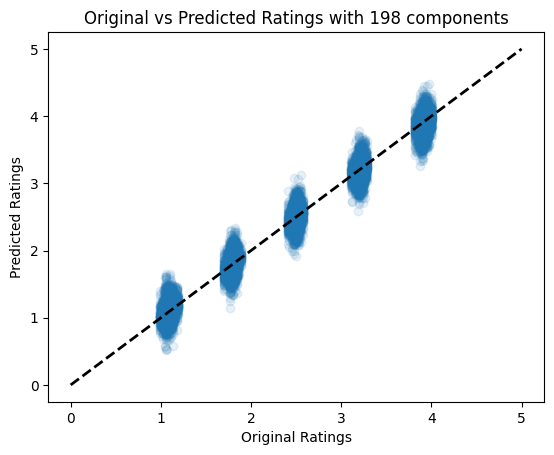



Mean squared error with 199 components: 0.004432683092259884


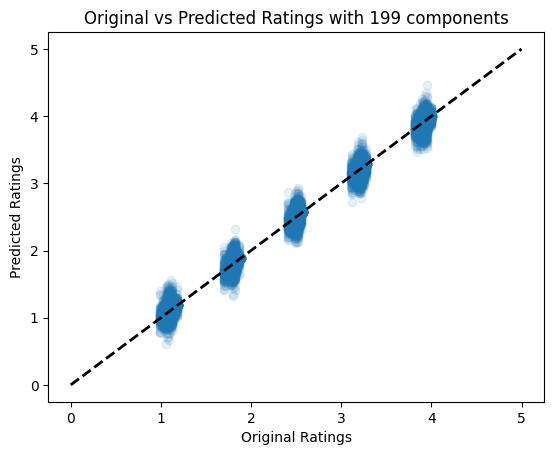



Mean squared error with 200 components: 5.1989489447404625e-30


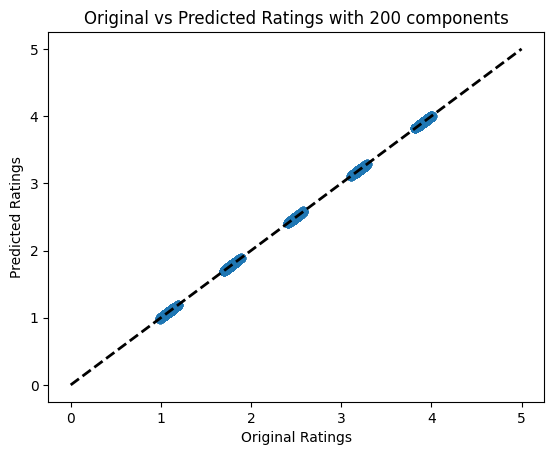

In [194]:
for n_components in [180, 190, 198, 199, 200]:
  pca = PCA(n_components)
  X_pca = pca.fit_transform(train_data)

  # Transform the test set using the principal components from the training set
  test_data_transformed = pca.transform(test_data)
  test_data_reconstructed = pca.inverse_transform(test_data_transformed)

  # Compute the mean squared error between the original and reconstructed ratings
  mse = mean_squared_error(test_data, test_data_reconstructed)
  print(f'Mean squared error with {n_components} components:', mse)

  # Plot a scatterplot of original ratings vs predicted ratings
  fig, ax = plt.subplots()
  ax.scatter(test_data.flatten()+2.5, test_data_reconstructed.flatten()+2.5, alpha=0.1)
  ax.set_xlabel('Original Ratings')
  ax.set_ylabel('Predicted Ratings')
  ax.set_title(f'Original vs Predicted Ratings with {n_components} components')
  ax.plot([0, 5], [0, 5], 'k--', lw=2)
  plt.show()
  print("\n")

Please submit your Python notebook with all code, outputs, and explanations clearly shown. We'll evaluate your problem set based on the correctness and clarity of your code, the correctness and depth of your explanations, and the creativity of your interpretations.